<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [3]:
df.head()

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...


In [4]:
df = df[['title', 'company', 'description']]
df.head()

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...


In [5]:
df = df.drop_duplicates(subset='description')
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [6]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [7]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [job, details, , description, , essential, dut...
2    [as, a, team, member, in, the, finance, and, i...
4    [overview, , american, credit, acceptance, see...
5    [jp, morgans, corporate, , investment, bank, c...
6    [at, vystar, we, offer, competitive, pay, an, ...
Name: tokens, dtype: object

In [8]:
df['tokens'].iloc[-1][0]

'tldr'

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [9]:
### 이곳에서 과제를 진행해 주세요 ### 
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)


def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [10]:
### 이곳에서 과제를 진행해 주세요 ### 
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
156,and,755,21864,1.0,0.053487,0.053487,0.997358
0,,751,21493,2.0,0.052580,0.106067,0.992074
212,to,754,12694,3.0,0.031054,0.137121,0.996037
30,the,745,10538,4.0,0.025780,0.162901,0.984148
201,of,745,8839,5.0,0.021623,0.184524,0.984148
11,data,740,7425,6.0,0.018164,0.202689,0.977543
204,in,748,6769,7.0,0.016559,0.219248,0.988111
32,a,739,6436,8.0,0.015745,0.234993,0.976222
1,with,742,5727,9.0,0.014010,0.249003,0.980185
500,for,727,4132,10.0,0.010108,0.259111,0.960370


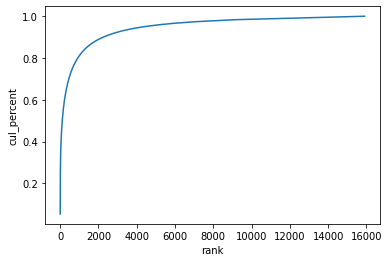

In [11]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [12]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


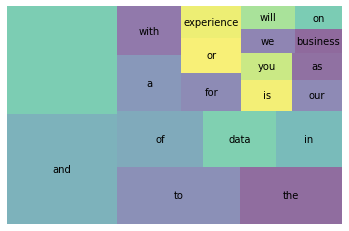

In [13]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [14]:
### 이곳에서 과제를 진행해 주세요 ### 
STOP_WORDS = nlp.Defaults.stop_words.union(['data','work'])

In [15]:
tokens = []
for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.text.lower() != "\n") & (token.text.lower() !="\n\n"):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [16]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
59,experience,687,3055,1.0,0.012447,0.012447,0.907530
284,business,518,1885,2.0,0.007680,0.020128,0.684280
47,team,548,1323,3.0,0.005390,0.025518,0.723910
551,learning,467,1193,4.0,0.004861,0.030379,0.616909
641,machine,468,1140,5.0,0.004645,0.035024,0.618230
896,science,460,1048,6.0,0.004270,0.039294,0.607662
44,ability,452,958,7.0,0.003903,0.043197,0.597094
141,analysis,436,896,8.0,0.003651,0.046848,0.575958
227,statistical,409,890,9.0,0.003626,0.050474,0.540291
140,skills,466,886,10.0,0.003610,0.054084,0.615588


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [17]:
### 이곳에서 과제를 진행해 주세요 ### 
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.text.lower() != "\n") & (token.text.lower() !="\n\n"):
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_)
   
    return lemmas

In [18]:
df['lemmas'] = df['description'].apply(get_lemmas)
wc_lemma = word_count(df['lemmas'])

In [19]:
wc_lemma.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
51,experience,710,3596,1.0,0.014625,0.014625,0.937913
377,team,630,2241,2.0,0.009114,0.023740,0.832232
250,business,528,2029,3.0,0.008252,0.031992,0.697490
123,analysis,536,1545,4.0,0.006284,0.038276,0.708058
185,model,518,1400,5.0,0.005694,0.043969,0.684280
452,learning,474,1283,6.0,0.005218,0.049188,0.626156
126,product,439,1194,7.0,0.004856,0.054044,0.579921
165,skill,535,1180,8.0,0.004799,0.058843,0.706737
177,include,509,1177,9.0,0.004787,0.063630,0.672391
243,analytic,421,1145,10.0,0.004657,0.068287,0.556143


In [20]:
df.head()

,title,company,description,tokens,lemmas
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, details, description, essential, duties,...","[Job, Details, Description, Essential, Duties,..."
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[team, member, finance, internal, audit, depar...","[team, member, Finance, Internal, Audit, depar..."
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overview:, american, credit, acceptance, seek...","[overview, American, Credit, Acceptance, seek,..."
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[j.p., morgan's, corporate, &, investment, ban...","[J.P., Morgan, Corporate, Investment, Bank, CI..."
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[vystar,, offer, competitive, pay,, excellent,...","[VyStar, offer, competitive, pay, excellent, b..."


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

tfidf = TfidfVectorizer(stop_words='english', max_features= 3000)
dtm_tfidf = tfidf.fit_transform(df['description'])
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

knn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
knn.fit(dtm_tfidf)
knn.kneighbors([dtm_tfidf.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))

In [22]:
dtm_tfidf.shape

(757, 3000)

In [31]:
print(df['description'][88][:300])

We're looking for Data Scientists to work on our core and business products to help shape the future of what we build at Hyperspace Ventures. You will enjoy working with various data sets, cutting edge technology, and the ability to see your insights turned into real products on a regular basis. The


In [32]:
print(df['description'][40][:300])

Bachelor's Degree3+ years of experience with data scripting languages (e.g SQL, Python, R etc.) or statistical/mathematical software (e.g. R, SAS, or Matlab)2 years working as a Data Scientist

Do you want to be part of a team dedicated to building machine learning applications that process billions


## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [23]:
df['senior'] = df['title'].apply(lambda x: 1 if 'Senior' in x else 0)

In [24]:
df['senior'].value_counts()

0    662
1     95
Name: senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [25]:
### 이곳에서 과제를 진행해 주세요 ### 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf, df['senior'], test_size=0.1,  random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Precision Score : {precision_score(y_test, y_pred)}, Recall Score : {recall_score(y_test, y_pred)}")

Precision Score : 0.26666666666666666, Recall Score : 0.5
